
### Bagging -   Provide diff Subset of data to every Single ML models.


- How many diff types of data can be passed


1.  Bagging - Row Sampling with Replacement 

2.  Pasting - Row Sampling without Replacement 

3.  Random Subspaces - Column Sampling with or without replacement

4.  Random Patches - Row sampling as well as column sampling with or without replacement 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn import  datasets
data = datasets.load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Species'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
df.shape

(150, 5)

In [61]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

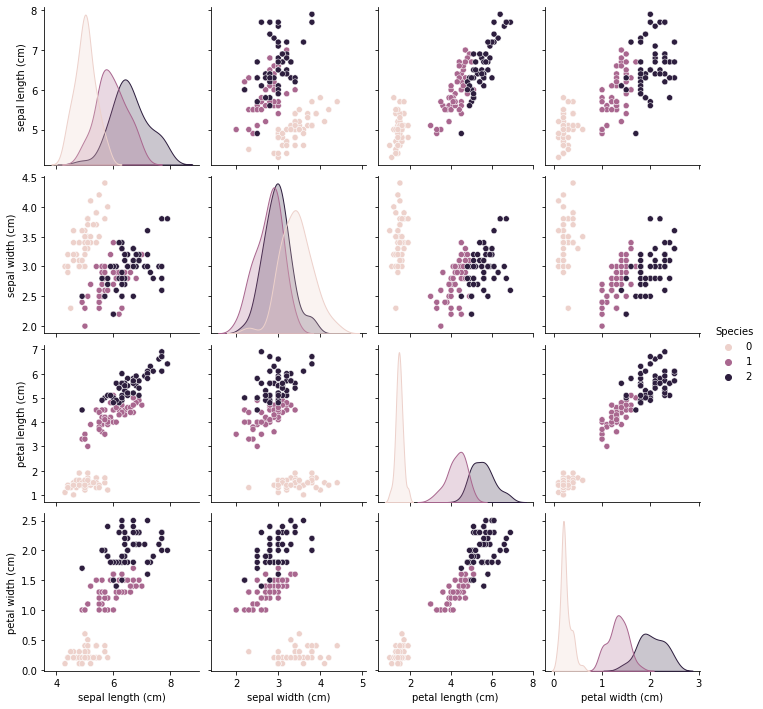

In [62]:
sns.pairplot(data=df,hue='Species')

### To make the classification problem more difficult we will only work on 2 features such as sepal length and width

### As from the diagram ,  we can see the scatter plot of sepal length and width are overlapping.

In [63]:
new_df = df[['sepal width (cm)','petal length (cm)','Species']]

In [64]:
new_df = new_df[new_df['Species'] != 0]
new_df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [65]:
new_df.reset_index(drop=True,inplace=True)
new_df

,sepal width (cm),petal length (cm),Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


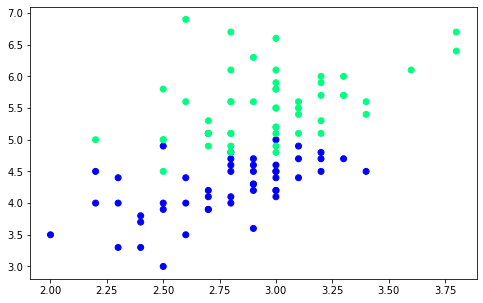

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(new_df['sepal width (cm)'],new_df['petal length (cm)'],
            c=new_df['Species'],cmap='winter')
plt.show()

In [70]:
new_df.shape

(100, 3)

In [71]:

# Shuffling the data and taking 10 rows for training 

new_df=new_df.sample(100)
df_train=new_df.iloc[:60,:].sample(10)
df_val=new_df.iloc[60:80,:].sample(5)
df_test=new_df.iloc[80:,:].sample(5)

In [73]:

# Splitting the X-test and y-test from validation data 
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [74]:
X_test

array([[3.1, 5.5],
       [2.6, 4. ],
       [3.3, 6. ],
       [3.4, 5.6],
       [2.8, 5.6]])

### 1.  Bagging  - Row Sampling with Replacement 

In [110]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [111]:

# Train 3 Decision Tree using diff training data sets
df_bag=df_train.sample(8,replace=True)
# take 8 samples from training data and replace=True means there is chance that 
# particular record can appear more than once.

X1=df_bag.iloc[:,0:2]
y1=df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
62,3.0,5.5,2
65,3.2,5.3,2
27,3.0,5.0,1
71,2.8,4.9,2
18,2.2,4.5,1
55,3.0,6.6,2
27,3.0,5.0,1
55,3.0,6.6,2


In [112]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print("Accuracy",accuracy_score(y_test,y_pred))

In [113]:
dt_bag1=DecisionTreeClassifier()

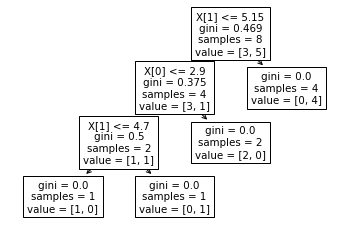

Accuracy 1.0


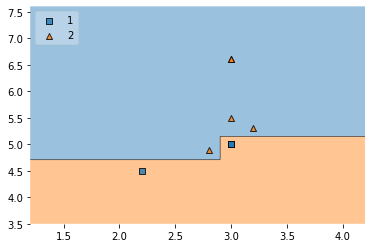

In [114]:
evaluate(dt_bag1,X1,y1)

In [115]:

# PLotting decision tree again using training data with diff samples

df_bag=df_train.sample(8,replace=True)
X2=df_bag.iloc[:,0:2]
y2=df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),Species
62,3.0,5.5,2
36,3.1,4.7,1
62,3.0,5.5,2
20,3.2,4.8,1
27,3.0,5.0,1
27,3.0,5.0,1
20,3.2,4.8,1
18,2.2,4.5,1


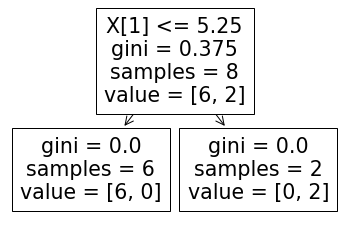

Accuracy 1.0


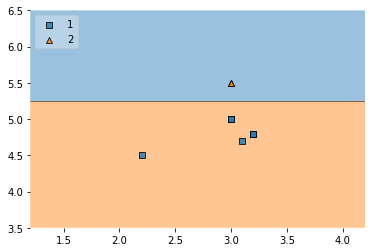

In [116]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X2,y2)

In [117]:
# PLotting decision tree again using training data with diff samples

df_bag=df_train.sample(8,replace=True)
X3=df_bag.iloc[:,0:2]
y3=df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),Species
65,3.2,5.3,2
64,2.8,5.1,2
64,2.8,5.1,2
62,3.0,5.5,2
27,3.0,5.0,1
20,3.2,4.8,1
36,3.1,4.7,1
65,3.2,5.3,2


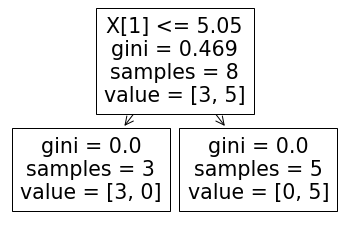

Accuracy 1.0


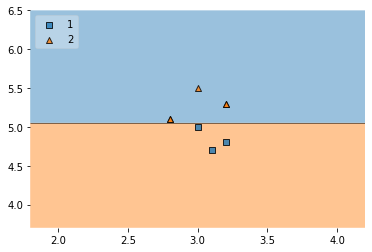

In [118]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X3,y3)

### Prediction - Aggregation

In [119]:
df_test

,sepal width (cm),petal length (cm),Species
88,3.0,4.8,2
12,2.2,4.0,1
77,3.0,4.9,2
31,2.4,3.7,1
96,2.5,5.0,2


In [122]:
print("Predictor 1",dt_bag1.predict(np.array([2.5,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.5,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.5,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


### 2.  Pasting - Row Sampling without Replacement 

In [126]:
# same rows will not appear more than once.
df_train.sample(8,replace=False)

,sepal width (cm),petal length (cm),Species
27,3.0,5.0,1
18,2.2,4.5,1
36,3.1,4.7,1
62,3.0,5.5,2
55,3.0,6.6,2
65,3.2,5.3,2
34,3.0,4.5,1
64,2.8,5.1,2


### 3.  Random Subspaces - Column Sampling with or without replacement

In [128]:
df1=df.sample(10)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
75,6.6,3.0,4.4,1.4,1
23,5.1,3.3,1.7,0.5,0
59,5.2,2.7,3.9,1.4,1
70,5.9,3.2,4.8,1.8,1
91,6.1,3.0,4.6,1.4,1
95,5.7,3.0,4.2,1.2,1
56,6.3,3.3,4.7,1.6,1
135,7.7,3.0,6.1,2.3,2
10,5.4,3.7,1.5,0.2,0
43,5.0,3.5,1.6,0.6,0


In [135]:

# As we have provided the axis=1,here are sampling based on column not rows. 

df1.sample(2,replace=True,axis=1)

,sepal length (cm),sepal length (cm)
75,6.6,6.6
23,5.1,5.1
59,5.2,5.2
70,5.9,5.9
91,6.1,6.1
95,5.7,5.7
56,6.3,6.3
135,7.7,7.7
10,5.4,5.4
43,5.0,5.0


### 4.  Random Patches - Row sampling as well as column sampling with or without replacement 

In [136]:

# row as well as column sampling 
df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,petal width (cm),sepal width (cm)
91,1.4,3.0
70,1.8,3.2
75,1.4,3.0
56,1.6,3.3
91,1.4,3.0
135,2.3,3.0
75,1.4,3.0
135,2.3,3.0


### THE END 